# DPhi Pandas Final Assignment
[Intro to Pandas 10-day Bootcamp](https://dphi.tech/bootcamps/introduction-to-pandas?utm_source=header) by [CSpanias](https://cspanias.github.io/aboutme/), 02/2022 

# CONTENT
1. [Data Wrangling](#wrangling)
1. [Exploring Data](#eda)
1. [Formulating Questions](#questions)
1. [Conclusions](#conc)

<a name='wrangling'></a>
# 1. Data Wrangling

I choose to find a dataset close to my personal interests, hence, as a Brazilian jiu-jitsu practitioner, I managed to found a Kaggle [dataset](https://www.kaggle.com/drewskidata/top-10-bjj-grapplers) with data from the __top10 BJJ Grapplers__.

This dataset includes __no metadata__, so I have no information on __how it was obtained, from where and for what purpose__. As a result, I can't really check if it contains __legit data or not__, but since this is a practice exercise it does not really matter! 

Our data files consists of:
1. One `.xlxs` file, which contains __data for all 10 athletes__
2. Ten `.xlxs` files, which contain __data for each athlete individually__.

For practising purposes, we will ignore the former, so we can practice joining different files ourselves.

Our files are in the form `athlete_name1.xlxs`, `athlete_name2.xlxs`, etc. Our first goal is to __get all of the relevant information into one table__ so that we can analyze the aggregate data.

We can combine the use of `glob`, which can __open multiple files__ by using __regex matching__ to get the filenames, with `pandas` to organize this data better.

In [1]:
import glob
import re

# return all file paths that match the specific pattern
files = glob.glob(r"*.xlsx")

print(f"We have found the following {len(files)} files:\n\n{files}")

We have found the following 10 files:

['craig_jones.xlsx', 'diego_pato_oliveira.xlsx', 'gordon_ryan.xlsx', 'kade_ruotolo.xlsx', 'kaynan_duarte.xlsx', 'kennedy_maciel.xlsx', 'micael_galvo.xlsx', 'michael_musumeci.xlsx', 'tim_spriggs.xlsx', 'tye_ruotolo.xlsx']


We can see that we managed to put all 10 file names into a list, and now we have to __extract the data from each one__.

In [2]:
import pandas as pd

# create empty list
df_list = []

# iterate through files
for filename in files:
    # extract data from each file as DataFrame
    data = pd.read_excel(filename)
    # append file's data
    df_list.append(data)
    
print(f" We have {len(df_list)} elements in our list.\
 The 1st element is the data for the Fighter named {df_list[0]['Fighter'][0]}.")

df_list[0]

 We have 10 elements in our list. The 1st element is the data for the Fighter named Craig Jones.


,Column1,Opponent,W/L,Method,Competition,Year,Fighter
0,0,Vagner RochaVagner Rocha,L,EBI/OT,EBI 11,2017,Craig Jones
1,1,Keenan CorneliusKeenan Cornelius,L,Pts: 13x0,ADCC,2017,Craig Jones
2,2,Alexandre RibeiroAlexandre Ribeiro,L,Pts: 2x0,ADCC,2017,Craig Jones
3,3,Gordon RyanGordon Ryan,L,Katagatame,ADCC,2017,Craig Jones
4,4,Gordon RyanGordon Ryan,L,EBI/OT,EBI 14,2017,Craig Jones
...,...,...,...,...,...,...,...
62,64,Satoshi Ishii,W,RNC,SUG 20,2020,Craig Jones
63,65,Ronaldo JuniorRonaldo Junior,W,Inside heel hook,WNO 6,2021,Craig Jones
64,66,Luiz PanzaLuiz Panza,W,Inside heel hook,WNO 9,2021,Craig Jones
65,67,Tye RuotoloTye Ruotolo,W,Referee Decision,WNO 10,2021,Craig Jones


We have now successfuly imported every file as a pandas DataFrame, and we have a list of 10 DataFrames. The last step if to __convert the list into one pandas DataFrame__. 

In [3]:
# concatenate all elements    
df = pd.concat(df_list)

# check first 5 rows
df

,Column1,Opponent,W/L,Method,Competition,Year,Fighter
0,0,Vagner RochaVagner Rocha,L,EBI/OT,EBI 11,2017,Craig Jones
1,1,Keenan CorneliusKeenan Cornelius,L,Pts: 13x0,ADCC,2017,Craig Jones
2,2,Alexandre RibeiroAlexandre Ribeiro,L,Pts: 2x0,ADCC,2017,Craig Jones
3,3,Gordon RyanGordon Ryan,L,Katagatame,ADCC,2017,Craig Jones
4,4,Gordon RyanGordon Ryan,L,EBI/OT,EBI 14,2017,Craig Jones
...,...,...,...,...,...,...,...
13,13,Kody SteeleKody Steele,W,Inside heel hook,WNO 5,2020,Tye Ruotolo
14,14,William TackettWilliam Tackett,W,Referee Decision,WNO 8,2021,Tye Ruotolo
15,15,Johnny TamaJohnny Tama,W,Darce choke,WNO Champ.,2021,Tye Ruotolo
16,16,Dante LeonDante Leon,W,Guillotine,WNO Champ.,2021,Tye Ruotolo


There are __3 issues__ on this DataFrame:
1. We can see that the `Column1` column is just an index, and thus unecessary information for us.


2. The column `Opponent` has the name of the athlete repeated.


3. The `Method` column includes numerical characters (`13x0`) as well as special characters (`:`) which we are not interesting in. We want to know just the winning method, e.g. `Pts` which means that the match was won on points, and not the exact score.

We will first __create a copy of the DataFrame__ and work on that, so if something goes wrong we can go back to the original DataFrame without a problem.

In [4]:
# create copy
df_bjj = df.copy()

# check DF
df_bjj

,Column1,Opponent,W/L,Method,Competition,Year,Fighter
0,0,Vagner RochaVagner Rocha,L,EBI/OT,EBI 11,2017,Craig Jones
1,1,Keenan CorneliusKeenan Cornelius,L,Pts: 13x0,ADCC,2017,Craig Jones
2,2,Alexandre RibeiroAlexandre Ribeiro,L,Pts: 2x0,ADCC,2017,Craig Jones
3,3,Gordon RyanGordon Ryan,L,Katagatame,ADCC,2017,Craig Jones
4,4,Gordon RyanGordon Ryan,L,EBI/OT,EBI 14,2017,Craig Jones
...,...,...,...,...,...,...,...
13,13,Kody SteeleKody Steele,W,Inside heel hook,WNO 5,2020,Tye Ruotolo
14,14,William TackettWilliam Tackett,W,Referee Decision,WNO 8,2021,Tye Ruotolo
15,15,Johnny TamaJohnny Tama,W,Darce choke,WNO Champ.,2021,Tye Ruotolo
16,16,Dante LeonDante Leon,W,Guillotine,WNO Champ.,2021,Tye Ruotolo


We will first tackle the simplest issue out of the three: __removing__ `Column1`.

In [5]:
# drop col
df_bjj.drop(columns='Column1', axis=1, inplace=True)

# check that it worked
df_bjj.head()

,Opponent,W/L,Method,Competition,Year,Fighter
0,Vagner RochaVagner Rocha,L,EBI/OT,EBI 11,2017,Craig Jones
1,Keenan CorneliusKeenan Cornelius,L,Pts: 13x0,ADCC,2017,Craig Jones
2,Alexandre RibeiroAlexandre Ribeiro,L,Pts: 2x0,ADCC,2017,Craig Jones
3,Gordon RyanGordon Ryan,L,Katagatame,ADCC,2017,Craig Jones
4,Gordon RyanGordon Ryan,L,EBI/OT,EBI 14,2017,Craig Jones


We can know deal with the slightly more complex issue of the `Opponent` column. Let's start by inspecting the column.

In [6]:
# check unique values
df_bjj.Opponent.value_counts()

Keenan CorneliusKeenan Cornelius    12
Tex JohnsonTex Johnson              10
Yuri SimoesYuri Simoes               8
Gabriel SousaGabriel Sousa           7
Matheus DinizMatheus Diniz           7
                                    ..
David Newton                         1
Abraham Hall                         1
Benjamin Dixon                       1
Chad Allen                           1
Mica GalvaoMica Galvao               1
Name: Opponent, Length: 364, dtype: int64

We can see that __some names__ are in the form `first_name last_namefirst_name last_name`, but __other names are as it should be__.

Possible solution:
1. `split` each string on __whitespace__ and __expand__ each value on a new column


2. __concatenate__ the 1st and 3rd value, i.e. `first_name` and `last_name` with a whitespace in between them


3. `drop` the middle column, i.e. `last_namefirst_name`,

Job (almost) done!

In [7]:
# split column on empty space
split_opp = df_bjj.Opponent.str.split(' ', expand=True)
split_opp

,0,1,2
0,Vagner,RochaVagner,Rocha
1,Keenan,CorneliusKeenan,Cornelius
2,Alexandre,RibeiroAlexandre,Ribeiro
3,Gordon,RyanGordon,Ryan
4,Gordon,RyanGordon,Ryan
...,...,...,...
13,Kody,SteeleKody,Steele
14,William,TackettWilliam,Tackett
15,Johnny,TamaJohnny,Tama
16,Dante,LeonDante,Leon


We can see that `Opponent` column was successfuly split into what is seems like:
1. first_name (`0`)
2. first_last_name (`1`)
3. last_name (`2`)

If we check the `shape` of `split.opp` we will see that if we just concatenate columns `0` and `2`, we will __lose 190__ values, as column `2` has only 408 values because some names format were fine to begin with, e.g. `Chad Allen`, so they have been split only in the column `0` and `1`.

In [8]:
# check df's shape
split_opp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       598 non-null    object
 1   1       598 non-null    object
 2   2       408 non-null    object
dtypes: object(3)
memory usage: 18.7+ KB


Let's first __assign all columns__ to our working `df_bjj` DataFrame.

In [9]:
# assign splitted cols to DF
df_bjj = df_bjj.assign(Opp_fname = split_opp[0], Opp_lname = split_opp[2], Opp_first_lname = split_opp[1])
df_bjj

,Opponent,W/L,Method,Competition,Year,Fighter,Opp_fname,Opp_lname,Opp_first_lname
0,Vagner RochaVagner Rocha,L,EBI/OT,EBI 11,2017,Craig Jones,Vagner,Rocha,RochaVagner
1,Keenan CorneliusKeenan Cornelius,L,Pts: 13x0,ADCC,2017,Craig Jones,Keenan,Cornelius,CorneliusKeenan
2,Alexandre RibeiroAlexandre Ribeiro,L,Pts: 2x0,ADCC,2017,Craig Jones,Alexandre,Ribeiro,RibeiroAlexandre
3,Gordon RyanGordon Ryan,L,Katagatame,ADCC,2017,Craig Jones,Gordon,Ryan,RyanGordon
4,Gordon RyanGordon Ryan,L,EBI/OT,EBI 14,2017,Craig Jones,Gordon,Ryan,RyanGordon
...,...,...,...,...,...,...,...,...,...
13,Kody SteeleKody Steele,W,Inside heel hook,WNO 5,2020,Tye Ruotolo,Kody,Steele,SteeleKody
14,William TackettWilliam Tackett,W,Referee Decision,WNO 8,2021,Tye Ruotolo,William,Tackett,TackettWilliam
15,Johnny TamaJohnny Tama,W,Darce choke,WNO Champ.,2021,Tye Ruotolo,Johnny,Tama,TamaJohnny
16,Dante LeonDante Leon,W,Guillotine,WNO Champ.,2021,Tye Ruotolo,Dante,Leon,LeonDante


In [10]:
# remove the old col
df_bjj.drop(columns='Opponent', axis=1, inplace=True)

# check new df
df_bjj

,W/L,Method,Competition,Year,Fighter,Opp_fname,Opp_lname,Opp_first_lname
0,L,EBI/OT,EBI 11,2017,Craig Jones,Vagner,Rocha,RochaVagner
1,L,Pts: 13x0,ADCC,2017,Craig Jones,Keenan,Cornelius,CorneliusKeenan
2,L,Pts: 2x0,ADCC,2017,Craig Jones,Alexandre,Ribeiro,RibeiroAlexandre
3,L,Katagatame,ADCC,2017,Craig Jones,Gordon,Ryan,RyanGordon
4,L,EBI/OT,EBI 14,2017,Craig Jones,Gordon,Ryan,RyanGordon
...,...,...,...,...,...,...,...,...
13,W,Inside heel hook,WNO 5,2020,Tye Ruotolo,Kody,Steele,SteeleKody
14,W,Referee Decision,WNO 8,2021,Tye Ruotolo,William,Tackett,TackettWilliam
15,W,Darce choke,WNO Champ.,2021,Tye Ruotolo,Johnny,Tama,TamaJohnny
16,W,Guillotine,WNO Champ.,2021,Tye Ruotolo,Dante,Leon,LeonDante


In order to not lose any value from the original `Opponent` column, we will use a __conditional statement__ to check if there is or there isn't a value and concatenate appropriately.

In [11]:
# convert series to list
name_list = list(df_bjj.Opp_lname)
print(len(name_list))

# convert series to list
name_list_a = list(df_bjj.Opp_first_lname)
print(len(name_list))

new_name_list = []
for i in range(len(name_list)):
    if name_list[i] != None:
        new_name_list.append(name_list[i])
    if name_list[i] == None:
        new_name_list.append(name_list_a[i])

print(len(new_name_list))

598
598
598


In [12]:
# create a new col using the list
df_bjj['Opponent_lname'] = new_name_list
df_bjj

,W/L,Method,Competition,Year,Fighter,Opp_fname,Opp_lname,Opp_first_lname,Opponent_lname
0,L,EBI/OT,EBI 11,2017,Craig Jones,Vagner,Rocha,RochaVagner,Rocha
1,L,Pts: 13x0,ADCC,2017,Craig Jones,Keenan,Cornelius,CorneliusKeenan,Cornelius
2,L,Pts: 2x0,ADCC,2017,Craig Jones,Alexandre,Ribeiro,RibeiroAlexandre,Ribeiro
3,L,Katagatame,ADCC,2017,Craig Jones,Gordon,Ryan,RyanGordon,Ryan
4,L,EBI/OT,EBI 14,2017,Craig Jones,Gordon,Ryan,RyanGordon,Ryan
...,...,...,...,...,...,...,...,...,...
13,W,Inside heel hook,WNO 5,2020,Tye Ruotolo,Kody,Steele,SteeleKody,Steele
14,W,Referee Decision,WNO 8,2021,Tye Ruotolo,William,Tackett,TackettWilliam,Tackett
15,W,Darce choke,WNO Champ.,2021,Tye Ruotolo,Johnny,Tama,TamaJohnny,Tama
16,W,Guillotine,WNO Champ.,2021,Tye Ruotolo,Dante,Leon,LeonDante,Leon


Lets check that our new `Opponent_lname` has no missing values.

In [14]:
df_bjj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 17
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   W/L              598 non-null    object
 1   Method           598 non-null    object
 2   Competition      598 non-null    object
 3   Year             598 non-null    int64 
 4   Fighter          598 non-null    object
 5   Opp_fname        598 non-null    object
 6   Opp_lname        408 non-null    object
 7   Opp_first_lname  598 non-null    object
 8   Opponent_lname   598 non-null    object
dtypes: int64(1), object(8)
memory usage: 46.7+ KB


Now we can create a new colum to our `df_bjj` DataFrame by __concacenating the first and last name__ of the athletes.

In [15]:
# concatenate 'Opp_fname' and 'Opponent_lname'
df_bjj['Opponent'] = (df_bjj.Opp_fname + " " + df_bjj.Opponent_lname)
                                 
# check DF
df_bjj

,W/L,Method,Competition,Year,Fighter,Opp_fname,Opp_lname,Opp_first_lname,Opponent_lname,Opponent
0,L,EBI/OT,EBI 11,2017,Craig Jones,Vagner,Rocha,RochaVagner,Rocha,Vagner Rocha
1,L,Pts: 13x0,ADCC,2017,Craig Jones,Keenan,Cornelius,CorneliusKeenan,Cornelius,Keenan Cornelius
2,L,Pts: 2x0,ADCC,2017,Craig Jones,Alexandre,Ribeiro,RibeiroAlexandre,Ribeiro,Alexandre Ribeiro
3,L,Katagatame,ADCC,2017,Craig Jones,Gordon,Ryan,RyanGordon,Ryan,Gordon Ryan
4,L,EBI/OT,EBI 14,2017,Craig Jones,Gordon,Ryan,RyanGordon,Ryan,Gordon Ryan
...,...,...,...,...,...,...,...,...,...,...
13,W,Inside heel hook,WNO 5,2020,Tye Ruotolo,Kody,Steele,SteeleKody,Steele,Kody Steele
14,W,Referee Decision,WNO 8,2021,Tye Ruotolo,William,Tackett,TackettWilliam,Tackett,William Tackett
15,W,Darce choke,WNO Champ.,2021,Tye Ruotolo,Johnny,Tama,TamaJohnny,Tama,Johnny Tama
16,W,Guillotine,WNO Champ.,2021,Tye Ruotolo,Dante,Leon,LeonDante,Leon,Dante Leon


Now we can __remove the unecessary columns__.

In [17]:
# remove the unecessary cols
df_bjj.drop(columns=['Opp_fname', 'Opp_first_lname', 'Opp_lname', 'Opponent_lname'], axis=1, inplace=True)

# check new df
df_bjj

,W/L,Method,Competition,Year,Fighter,Opponent
0,L,EBI/OT,EBI 11,2017,Craig Jones,Vagner Rocha
1,L,Pts: 13x0,ADCC,2017,Craig Jones,Keenan Cornelius
2,L,Pts: 2x0,ADCC,2017,Craig Jones,Alexandre Ribeiro
3,L,Katagatame,ADCC,2017,Craig Jones,Gordon Ryan
4,L,EBI/OT,EBI 14,2017,Craig Jones,Gordon Ryan
...,...,...,...,...,...,...
13,W,Inside heel hook,WNO 5,2020,Tye Ruotolo,Kody Steele
14,W,Referee Decision,WNO 8,2021,Tye Ruotolo,William Tackett
15,W,Darce choke,WNO Champ.,2021,Tye Ruotolo,Johnny Tama
16,W,Guillotine,WNO Champ.,2021,Tye Ruotolo,Dante Leon


Lets check for `NaN`s one more time!

In [18]:
# check NaNs per col
df_bjj.isna().sum()

W/L            0
Method         0
Competition    0
Year           0
Fighter        0
Opponent       0
dtype: int64

Everything looks better now. The last issue we need to deal with is removing both the numerical and special characters from the `Method` column.

We can `split` while __extracting__ digits and special chars using __regular expressions__ and `expand` values into new columns.

In [19]:
# extract and split on digits
df_method = df_bjj.Method.str.split(r'(\d+)|:', expand=True)
df_method

,0,1,2,3,4,5,6
0,EBI/OT,None,None,None,None,None,None
1,Pts,None,,13,x,0,
2,Pts,None,,2,x,0,
3,Katagatame,None,None,None,None,None,None
4,EBI/OT,None,None,None,None,None,None
...,...,...,...,...,...,...,...
13,Inside heel hook,None,None,None,None,None,None
14,Referee Decision,None,None,None,None,None,None
15,Darce choke,None,None,None,None,None,None
16,Guillotine,None,None,None,None,None,None


We can see that the 1st column is just what we need, thus, we can `assign` it to our DataFrame, while __droping__ the old `Method` column.

In [20]:
# assign first col to df_clean
df_bjj = df_bjj.assign(Winning_Method = df_method[0])

# remove old col
df_bjj.drop(columns='Method', axis=1, inplace=True)

# check df
df_bjj.head()

,W/L,Competition,Year,Fighter,Opponent,Winning_Method
0,L,EBI 11,2017,Craig Jones,Vagner Rocha,EBI/OT
1,L,ADCC,2017,Craig Jones,Keenan Cornelius,Pts
2,L,ADCC,2017,Craig Jones,Alexandre Ribeiro,Pts
3,L,ADCC,2017,Craig Jones,Gordon Ryan,Katagatame
4,L,EBI 14,2017,Craig Jones,Gordon Ryan,EBI/OT


Our DataFrame looks good; the `Opponent` and `Winning_Method` columns look much more useful now.

We can now __start exploring__ our dataset!

<a name='eda'></a>
# 2. Exploring Data 

Since, we __did not collect the data ourselves to answer a specific question__, we can explore what we have and see what we can come up with.  

In [21]:
# check shape
df_bjj.shape

(598, 6)

As we can see our dataset has __598 rows__ and __6 columns__.

In [22]:
# check basic info
df_bjj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 17
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   W/L             598 non-null    object
 1   Competition     598 non-null    object
 2   Year            598 non-null    int64 
 3   Fighter         598 non-null    object
 4   Opponent        598 non-null    object
 5   Winning_Method  598 non-null    object
dtypes: int64(1), object(5)
memory usage: 32.7+ KB


Our DataFrame contains __no null values__ (almost all rows have 598 values)  in 5 out of 6 cols, and we have __5 columns of type `object`__ and __1 column of type `integer`__.

In [24]:
# check year values
df_bjj.Year.value_counts()

2019    160
2018    136
2020     83
2021     81
2017     63
2016     38
2015     25
2014     12
Name: Year, dtype: int64

Looking at the `Year` column we can see that the dataset includes relatively __recent matches (2014 to 2021)__, and that __the majority__ of them took place in __2019__. 

In [26]:
# check basic stats of the object cols
df_bjj.describe(include='object')

,W/L,Competition,Fighter,Opponent,Winning_Method
count,598,598,598,598,598
unique,2,163,10,364,48
top,W,ADCC,Kaynan Duarte,Keenan Cornelius,Pts
freq,495,45,116,12,198


From the above results, we can see that:
1. there are __364 different opponents__, the most common being `Keenan Cornelius`


2. __48 unique methods of winning__, the most common being `Pts`


3. __163 different competitions__, the most commong beign `ADCC`


4. we have __10 different athletes__ and the __most data are held for__ `Kaynan Duarte`


We can see each athlete's name.

In [28]:
# check athletes
df_bjj.Fighter.value_counts()

Kaynan Duarte       116
Gordan Ryan          94
Tim Spriggs          94
Kennedy Maciel       73
Craig Jones          67
Diego Olivera        60
Michael Musumeci     52
Tye Ruotolo          18
Micael Galvao        13
Kade Ruotolo         11
Name: Fighter, dtype: int64

<a name="questions"></a>
# 3. Formulating Questions

We will use [`sweetviz`](https://pypi.org/project/sweetviz/) for a "quick" but detailed look at on our `df_bjj` DataFrame.

We will try to answer the following 3 questions:

1. [What are the top 5 methods to win a match (based on frequency) ?](#q1)


2. [Who are the top 3 grapplers (based on win %) ?](#q2)


3. [Which are the most exciting competition to watch (based on relative submission rate) ?](#q3)

In [29]:
import sweetviz as sv

# analyze dataset
analyze_report = sv.analyze(df_bjj)

# display report as html page
analyze_report.show_html()

# # display report inside notebook
# analyze_report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<a name="q1"></a>
## 1. What are the top 5 methods to win a match (based on frequency) ?

`sweetviz` generates a beautiful table that directly answers out first question:

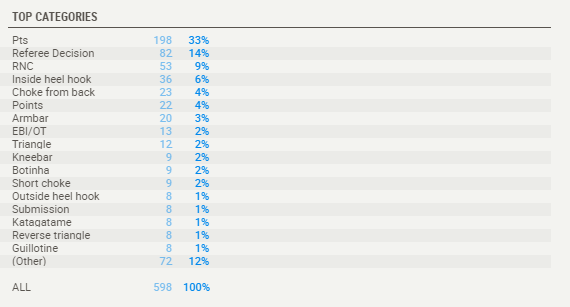

Almost half of the matches (47%) are won either via __points__ (33%) or __Referee Decision__ (14%)! 

Then we have the __RNC__ (9%), which stands for Rear Naked Choke, __Inside Heel Hook__ (6%), and __Choke from the back__ (4%).

We can easily confirm these numbers using the `pandas` library.

In [30]:
# check top5 winning methods
df_bjj.Winning_Method.value_counts()[:5]

Pts                 198
Referee Decision     82
RNC                  53
Inside heel hook     36
Choke from back      23
Name: Winning_Method, dtype: int64

In [31]:
# check % of top5 winning methods
df_bjj.Winning_Method.value_counts(normalize=True)[:5]

Pts                 0.331104
Referee Decision    0.137124
RNC                 0.088629
Inside heel hook    0.060201
Choke from back     0.038462
Name: Winning_Method, dtype: float64

<a name="q2"></a>
## 2. Who are the top 3 grapplers (based on win %) ?

We can __calculate the win percentage__ of each grappler in order to find out the top3 athletes. We can first check how many matches each athletes has via `sweetviz` and then confirm the number with `pandas`:

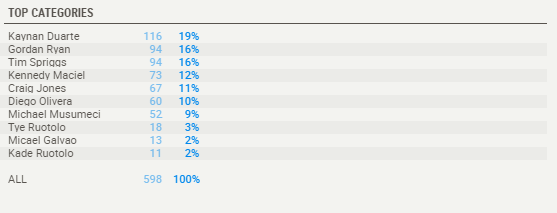

In [32]:
# check matches per athlete
df_bjj.Fighter.value_counts()

Kaynan Duarte       116
Gordan Ryan          94
Tim Spriggs          94
Kennedy Maciel       73
Craig Jones          67
Diego Olivera        60
Michael Musumeci     52
Tye Ruotolo          18
Micael Galvao        13
Kade Ruotolo         11
Name: Fighter, dtype: int64

The `W/L` column contains both Wins and Losses as strings, so we will have to find a way to:
1. __calculate the wins of each athlete__


2. __calculate his win percentage__

In [33]:
# inspect 'W/L' col
df_bjj['W/L']

0     L
1     L
2     L
3     L
4     L
     ..
13    W
14    W
15    W
16    W
17    W
Name: W/L, Length: 598, dtype: object

We can start by __replacing__ the letters `W` and `L` with `1` and `0`, respectively.

In [34]:
# replace 'W' with 1 and `L` with 0
df_bjj['W/L'].replace(['W', 'L'], [1, 0], inplace=True)
df_bjj

,W/L,Competition,Year,Fighter,Opponent,Winning_Method
0,0,EBI 11,2017,Craig Jones,Vagner Rocha,EBI/OT
1,0,ADCC,2017,Craig Jones,Keenan Cornelius,Pts
2,0,ADCC,2017,Craig Jones,Alexandre Ribeiro,Pts
3,0,ADCC,2017,Craig Jones,Gordon Ryan,Katagatame
4,0,EBI 14,2017,Craig Jones,Gordon Ryan,EBI/OT
...,...,...,...,...,...,...
13,1,WNO 5,2020,Tye Ruotolo,Kody Steele,Inside heel hook
14,1,WNO 8,2021,Tye Ruotolo,William Tackett,Referee Decision
15,1,WNO Champ.,2021,Tye Ruotolo,Johnny Tama,Darce choke
16,1,WNO Champ.,2021,Tye Ruotolo,Dante Leon,Guillotine


Next, we can __group athletes by name__ with `groupby` and `sum` their wins, since a `W` is now represented by `1`.

In [35]:
# calculate number of wins per athlete
wins_per_athlete = df_bjj['W/L'].groupby(df_bjj['Fighter']).sum()

# convert Series to DataFrame
df_wins_per_athlete = pd.DataFrame(wins_per_athlete)

# rename column appropriately
df_wins_per_athlete.rename(columns={'W/L': 'Wins'}, inplace=True)

# sort athletes alphabetically
df_wins_per_athlete.sort_values('Fighter', inplace=True)

# display DataFrame
df_wins_per_athlete

,Wins
Fighter,
Craig Jones,51
Diego Olivera,53
Gordan Ryan,89
Kade Ruotolo,9
Kaynan Duarte,102
Kennedy Maciel,59
Micael Galvao,10
Michael Musumeci,48
Tim Spriggs,62


Finally, we have to __calculate the win percentage of each athlete__ by diving the number of `Wins` with the total matches of each athlete.

In [36]:
df_bjj.Fighter.value_counts()

Kaynan Duarte       116
Gordan Ryan          94
Tim Spriggs          94
Kennedy Maciel       73
Craig Jones          67
Diego Olivera        60
Michael Musumeci     52
Tye Ruotolo          18
Micael Galvao        13
Kade Ruotolo         11
Name: Fighter, dtype: int64

In [37]:
# calculate number of matches per athlete
matches_per_athlete = df_bjj.Fighter.value_counts()

# convert Series to DataFrame
df_matches_per_athlete = pd.DataFrame(matches_per_athlete)

# display DataFrame
df_matches_per_athlete.reset_index().sort_values('index')

,index,Fighter
4,Craig Jones,67
5,Diego Olivera,60
1,Gordan Ryan,94
9,Kade Ruotolo,11
0,Kaynan Duarte,116
3,Kennedy Maciel,73
8,Micael Galvao,13
6,Michael Musumeci,52
2,Tim Spriggs,94
7,Tye Ruotolo,18


In [38]:
# concatenate the two DataFrames
df_win_perce = pd.concat([df_wins_per_athlete, df_matches_per_athlete], axis=1)

# rename column
df_win_perce.rename(columns={'Fighter': 'Matches'}, inplace=True)

# display DataFrame
df_win_perce

,Wins,Matches
Craig Jones,51,67
Diego Olivera,53,60
Gordan Ryan,89,94
Kade Ruotolo,9,11
Kaynan Duarte,102,116
Kennedy Maciel,59,73
Micael Galvao,10,13
Michael Musumeci,48,52
Tim Spriggs,62,94
Tye Ruotolo,12,18


In [39]:
# calculate win %
df_win_perce['win_perce'] = round((df_win_perce['Wins'] / df_win_perce['Matches'])*100, 2)

# reset index
df_win_perce.reset_index(inplace=True, drop=False)

# rename col
df_win_perce.rename(columns={'index': 'Fighter'}, inplace=True)

# sort DataFrame by win %
df_sorted_win = df_win_perce.sort_values('win_perce', ascending=False)

# display DataFrame
df_sorted_win

,Fighter,Wins,Matches,win_perce
2,Gordan Ryan,89,94,94.68
7,Michael Musumeci,48,52,92.31
1,Diego Olivera,53,60,88.33
4,Kaynan Duarte,102,116,87.93
3,Kade Ruotolo,9,11,81.82
5,Kennedy Maciel,59,73,80.82
6,Micael Galvao,10,13,76.92
0,Craig Jones,51,67,76.12
9,Tye Ruotolo,12,18,66.67
8,Tim Spriggs,62,94,65.96


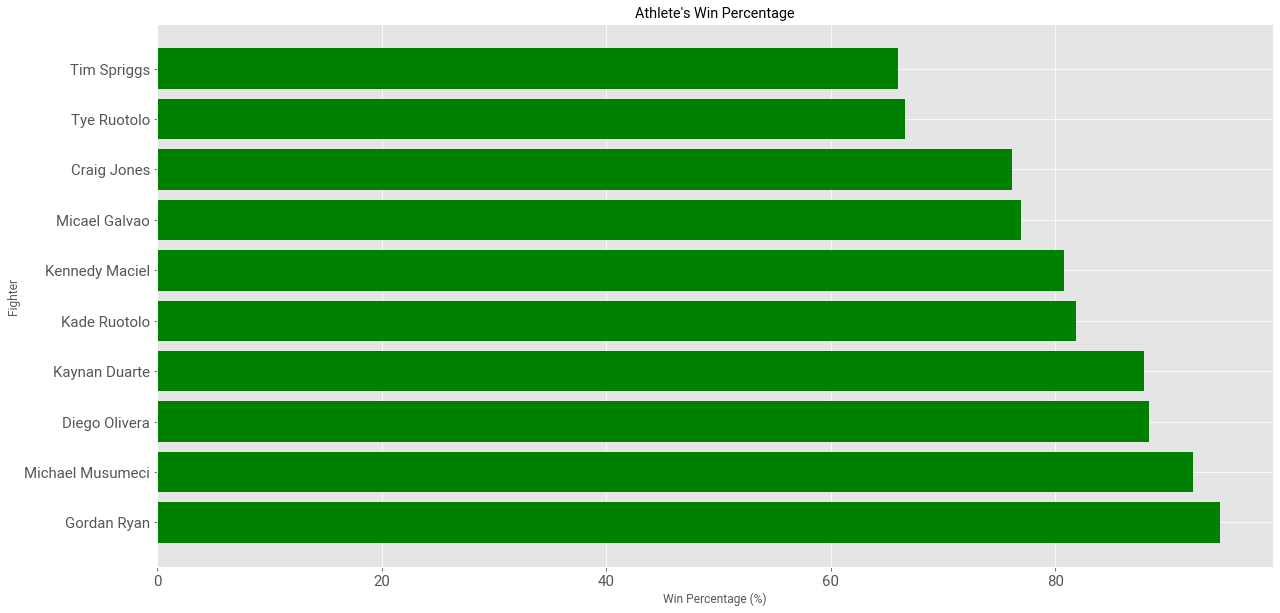

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.barh(df_sorted_win.Fighter, df_sorted_win.win_perce, color='green')
plt.xlabel("Win Percentage (%)")
plt.ylabel("Fighter")
plt.title("Athlete's Win Percentage")


plt.show()

<a name="q3"></a>
## 3. Which are the most exciting competition to watch (based on relative submission rate) ?

Lets first see __how many samples we have from each event__.

In [42]:
# check how many times each comp appears
df_comps = df_bjj.Competition.value_counts()

# convert series to DF
df_comps = pd.DataFrame(df_comps)

# display DF
df_comps

,Competition
ADCC,45
NoGi Worlds,32
World Champ.,29
Pan American,27
WNO Champ.,18
...,...
ADCC WC Trials,1
Studio 540 SPF,1
Netherlands Pro,1
Swiss Nat Pro,1


We will focus on events for which we have __more than 10 samples__.

In [43]:
# select only the comps that appear more that 10 times
df_comps_top = df_comps[df_comps.Competition > 10].reset_index()

# display DF
df_comps_top

,index,Competition
0,ADCC,45
1,NoGi Worlds,32
2,World Champ.,29
3,Pan American,27
4,WNO Champ.,18
5,European Open,18
6,No Gi Pan Am.,18
7,Copa Podio,15
8,Grappling Ind.,12


Next, we want to __remove the matches that were won by `Pts` or `Referee Desicion`__.

In [45]:
df_top = df_bjj[
    ((df_bjj.Competition == 'ADCC') | 
    (df_bjj.Competition == 'NoGi Worlds') |
    (df_bjj.Competition == 'World Champ') |
    (df_bjj.Competition == 'Pan American') |
    (df_bjj.Competition == 'WNO Champ.') | 
    (df_bjj.Competition == 'European Open.') |
    (df_bjj.Competition == 'No Gi Pan Am.') |
    (df_bjj.Competition == 'Copa Podio') |
    (df_bjj.Competition == 'Grappling ind.')) &
    (df_bjj.Winning_Method != 'Pts') &
    (df_bjj.Winning_Method != 'Referee Decision')
]

# display DF
df_top

,W/L,Competition,Year,Fighter,Opponent,Winning_Method
3,0,ADCC,2017,Craig Jones,Gordon Ryan,Katagatame
19,1,ADCC,2017,Craig Jones,Leandro Lo,RNC
20,1,ADCC,2017,Craig Jones,Murilo Santana,Flying triangle
21,1,ADCC,2017,Craig Jones,Chael Sonnen,Outside heel hook
50,1,ADCC,2019,Craig Jones,Ben Dyson,Inside heel hook
...,...,...,...,...,...,...
91,1,WNO Champ.,2021,Tim Spriggs,Rida Haisam,Inside heel hook
93,1,WNO Champ.,2021,Tim Spriggs,Kaynan Duarte,Inside heel hook
0,0,ADCC,2019,Tye Ruotolo,Kennedy Maciel,RNC
15,1,WNO Champ.,2021,Tye Ruotolo,Johnny Tama,Darce choke


In [59]:
# check if there is a row with 'Pts' or 'Referee Decision'
df_top.Winning_Method[(df_top.Winning_Method == 'Pts') | (df_top.Winning_Method == 'Referee Decision')]

Series([], Name: Winning_Method, dtype: object)

We will now slice `dt_top` DataFrame and work only with the required cols.

In [60]:
df_top = df_top.loc[:, ['Competition', 'Winning_Method']]

# display DF
df_top

,Competition,Winning_Method
3,ADCC,Katagatame
19,ADCC,RNC
20,ADCC,Flying triangle
21,ADCC,Outside heel hook
50,ADCC,Inside heel hook
...,...,...
91,WNO Champ.,Inside heel hook
93,WNO Champ.,Inside heel hook
0,ADCC,RNC
15,WNO Champ.,Darce choke


We will first __calculate the total submissions per event__.

In [61]:
# count subs per comp
df_top = df_top.groupby('Competition').count()

# sort DF
df_top_sorted = df_top.sort_values('Winning_Method', ascending=False)

# rename col
df_top_sorted.rename(columns={'Winning_Method': 'Total_Subs'}, inplace=True)

# display DF
df_top_sorted

,Total_Subs
Competition,
ADCC,27
NoGi Worlds,14
No Gi Pan Am.,11
WNO Champ.,11
Pan American,10
Copa Podio,5


Then, we will __calculate the total matches per event__.

In [63]:
# obtain the matches count per comp
df_allmatches = df_bjj.groupby('Competition').count().sort_values('Winning_Method', ascending=False)[:8]

# rename col
df_allmatches.rename(columns={'Winning_Method': 'Total_Matches'}, inplace=True)

# create a subset
df_allmatches = df_allmatches[['Total_Matches']]
                              
# display DF
df_allmatches

,Total_Matches
Competition,
ADCC,45
NoGi Worlds,32
World Champ.,29
Pan American,27
WNO Champ.,18
European Open,18
No Gi Pan Am.,18
Copa Podio,15


Finally, we will __calculate the submission percentage of each event__.

In [65]:
# concatenate DFs
final_df = pd.concat([df_top_sorted, df_allmatches], axis=1)

# calculate submission percentage per event
final_df['Sub_Perce'] = round((final_df.Total_Subs / final_df.Total_Matches) * 100, 2)

# sort DF
final_df.sort_values('Sub_Perce', inplace=True, ascending=False)

# display DF
final_df.head(6)

,Total_Subs,Total_Matches,Sub_Perce
Competition,,,
No Gi Pan Am.,11.0,18,61.11
WNO Champ.,11.0,18,61.11
ADCC,27.0,45,60.00
NoGi Worlds,14.0,32,43.75
Pan American,10.0,27,37.04
Copa Podio,5.0,15,33.33


<a name='conc'></a>
# 4. Conclusions

After a __brief analysis__ of a __limited and of an unkown trustworthiness dataset__ we have some interesting findings:
1. Almost half of the matches (47%) are won either via __points__ (33%) or __Referee Decision__ (14%) followed by the __RNC__ (9%), __Inside Heel Hook__ (6%), and __Choke from the back__ (4%).


2.  The __top3 athletes__ (based on win %) are: __Gordan Ryan__ (95%), __Michael Musumeci__ (92%), and __Diego Olivera__ (88%). 


3. The __most exciting events__ to watch (based on submission percentage) are: __NoGi PanAms__, __WNO__, and __ADCC__!